# 1. Project Objective

The objective of this project is to develop a robust machine learning model that can accurately detect fraudulent credit card transactions using a real-world dataset. By leveraging advanced classification algorithms and thorough data analysis, this project aims to support financial institutions in minimizing financial losses and improving transaction security.

# Project Motivation

Credit card fraud poses a significant threat to both consumers and financial organizations, resulting in billions of dollars in losses each year. As digital transactions become increasingly prevalent, the ability to quickly and reliably identify fraudulent activity is more critical than ever. This project was motivated by:

-    Industry Relevance: Fraud detection is a top priority for banks and payment processors, making it a highly  sought-after skill in the data science job market.

-    Data-Driven Challenge: The availability of a large, balanced, and richly featured dataset provides an excellent opportunity to apply data science techniques to a real-world, high-impact problem.

-    Skill Demonstration: This project showcases expertise in data wrangling, exploratory analysis, feature engineering, machine learning, and evaluation—all essential competencies for a data analyst or scientist.

By tackling this challenge, the project not only demonstrates technical proficiency but also addresses a problem with direct business and societal impact.




# 2. Import Packages

In [123]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, auc
)


In [124]:
df = pd.read_csv('/Users/RyanHenning/Documents/creditcard_2023.csv')

# 3. Data Cleaning

In [125]:
print("First 5 rows:")
print(df.head())

print("\nData Info:")
df.info()

print("\nMissing Values Per Column:")
print(df.isnull().sum())

print("\nClass Distribution:")
print(df['Class'].value_counts())

First 5 rows:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V2

# 4. Exploratory Data Analysis 

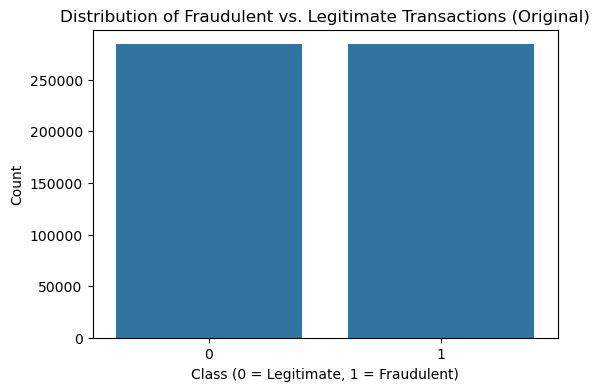

In [130]:
# Distribution of Target Variable (Original Class Imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions (Original)')
plt.xlabel('Class (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Count')
plt.show()

In [132]:
# Show actual class counts
print("Class distribution:\n", df['Class'].value_counts())

Class distribution:
 Class
0    284315
1    284315
Name: count, dtype: int64


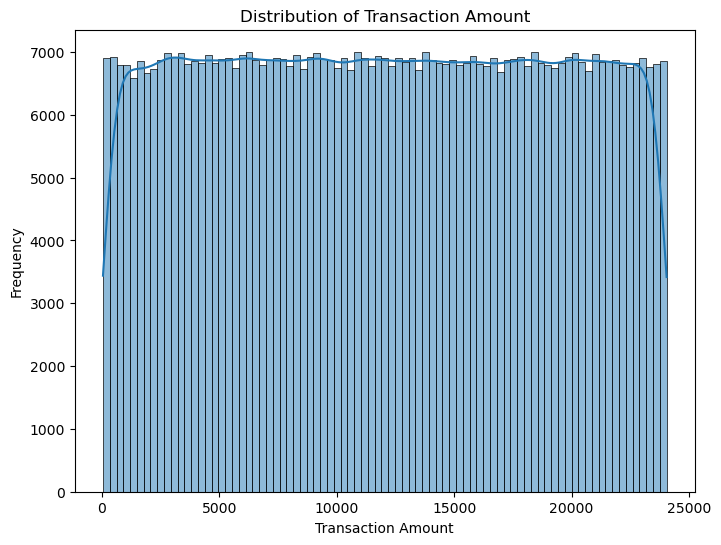

In [134]:
# Distribution of Transaction Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

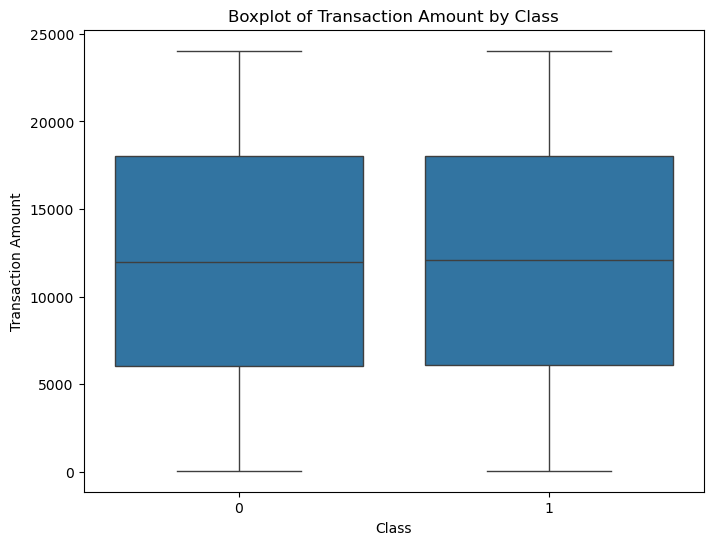

In [14]:
# Boxplot of Amount by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

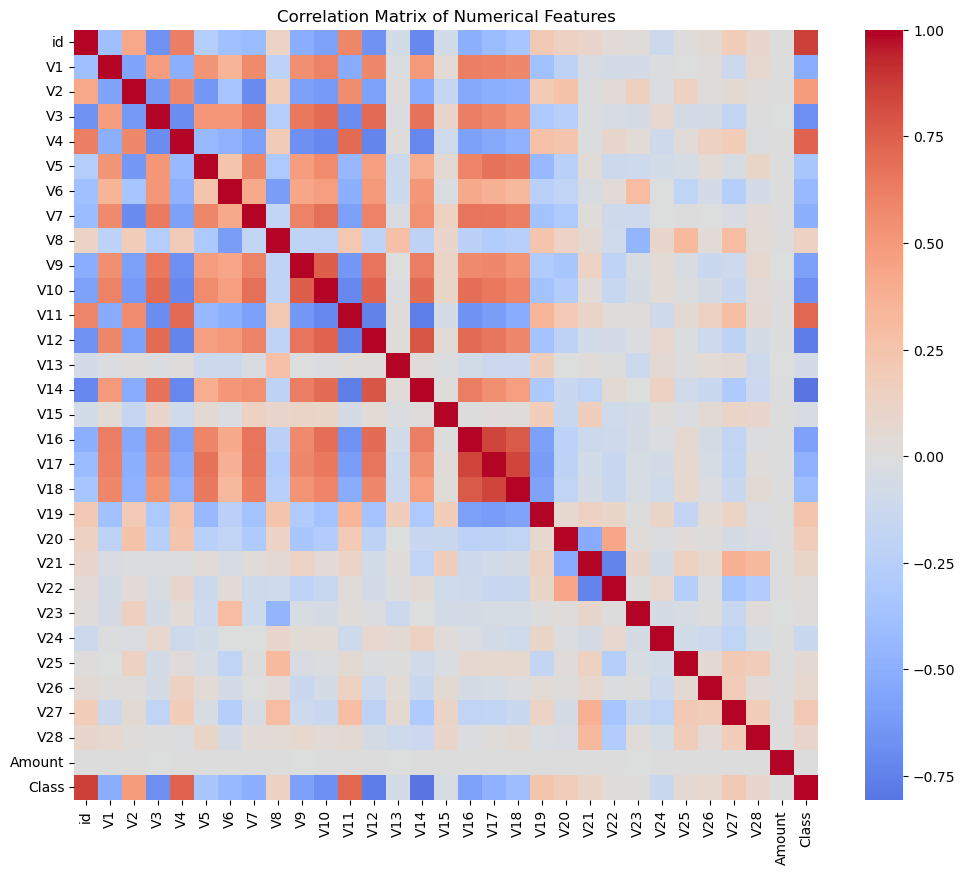

In [135]:
# Correlation Matrix (Numerical Features Only)
numerical_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Feature Engineering

In [138]:

# Drop columns not needed for modeling (e.g., 'id' if present)
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

# 6. Train-Test Split

In [140]:
## 6. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



# 7. Baseline Model: Logistic Regression

In [142]:
## 7. Baseline Model: Logistic Regression

baseline = LogisticRegression(max_iter=1000, random_state=42)
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)
y_proba_base = baseline.predict_proba(X_test)[:, 1]

print("Baseline Logistic Regression Report:")
print(classification_report(y_test, y_pred_base))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_base))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Baseline Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

ROC-AUC: 0.9934661613238455


# 8. Advanced Model: Gradient Boosting with Hyperparameter Tuning

In [143]:


from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Using HistGradientBoostingClassifier for faster training on large datasets
model = HistGradientBoostingClassifier(random_state=42)

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'max_iter': randint(100, 300),            # number of boosting iterations (trees)
    'learning_rate': uniform(0.01, 0.2),      # learning rate between 0.01 and 0.21
    'max_depth': randint(3, 8),                # tree depth between 3 and 7
    'min_samples_leaf': randint(20, 100),      # minimum samples per leaf
    'max_leaf_nodes': randint(20, 50)          # max leaf nodes per tree
}

# Setup RandomizedSearchCV with fewer iterations and 3-fold CV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,              # number of parameter settings sampled
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

print("Best parameters found:", random_search.best_params_)
print("Best F1 score:", random_search.best_score_)

best_model = random_search.best_estimator_



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'learning_rate': 0.1323306320976562, 'max_depth': 7, 'max_iter': 188, 'max_leaf_nodes': 36, 'min_samples_leaf': 78}
Best F1 score: 0.9996923378980732


In [146]:
import time
from sklearn.model_selection import cross_val_score

start_time = time.time()

cv_scores = cross_val_score(
    best_model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1
)

end_time = time.time()
elapsed = end_time - start_time

print("5-Fold Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))
print(f"Elapsed time: {elapsed:.2f} seconds")



5-Fold Cross-Validation F1 Scores: [0.99972529 0.99827452 0.99961546 0.99975825 0.99876964]
Mean F1 Score: 0.9992286303480744
Elapsed time: 43.96 seconds


# 9. Model Evaluation

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC Score: 1.0000


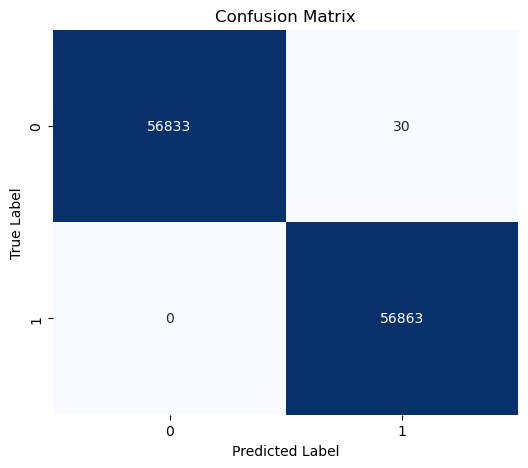

In [151]:

# Predict class labels and probabilities on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Print classification report
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# 10. Feature Importance

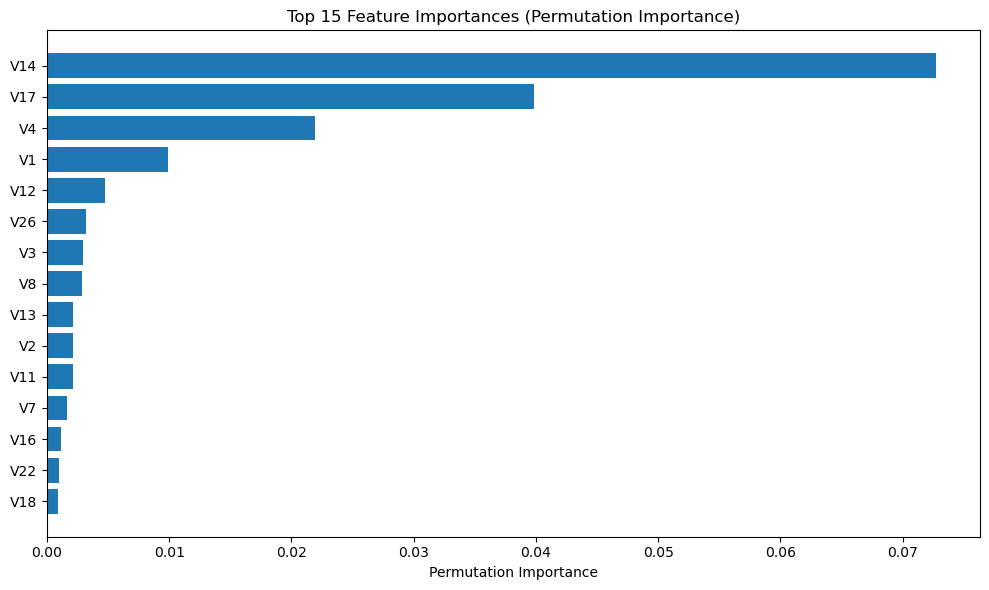

In [150]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_model, X_test, y_test, 
    n_repeats=10, random_state=42, n_jobs=-1
)

importances = result.importances_mean
feature_names = X_test.columns

import pandas as pd
import matplotlib.pyplot as plt

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1])
plt.xlabel('Permutation Importance')
plt.title('Top 15 Feature Importances (Permutation Importance)')
plt.tight_layout()
plt.show()


# 11. ROC and Precision-Recall Curves

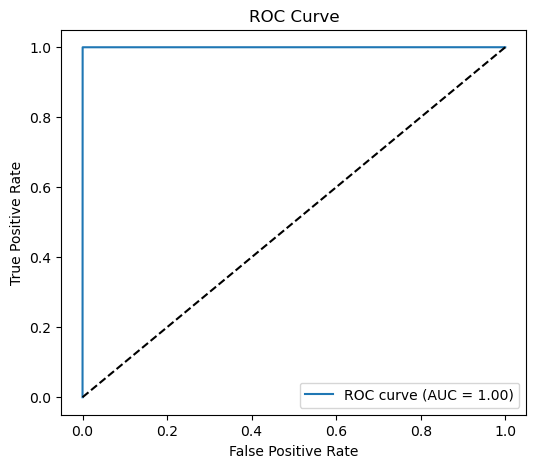

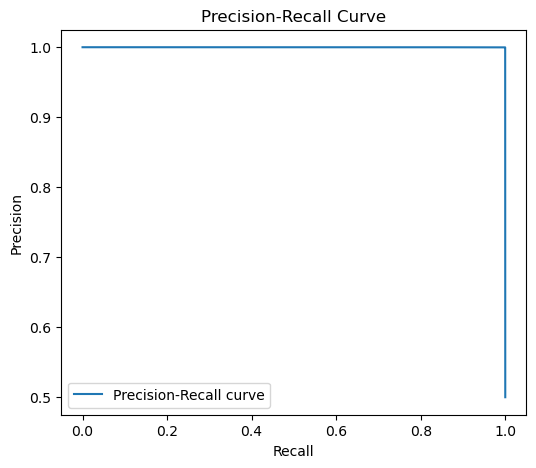

In [154]:


# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# 12. Threshold Tuning

In [156]:


thresholds = np.arange(0.1, 0.9, 0.05)
for thresh in thresholds:
    preds = (y_proba >= thresh).astype(int)
    print(f"Threshold: {thresh:.2f}")
    print(classification_report(y_test, preds))


Threshold: 0.10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Threshold: 0.15
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Threshold: 0.20
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00   

# 13. Export Model

In [158]:
joblib.dump(best_model, 'fraud_detection_model.pkl')
print("Model saved as fraud_detection_model.pkl")


Model saved as fraud_detection_model.pkl


# 14. Sample Predictions

In [160]:


sample = X_test.iloc[:5]
sample_preds = best_model.predict(sample)
sample_probs = best_model.predict_proba(sample)[:, 1][:5]

print("Sample Predictions:")
for i, (pred, prob) in enumerate(zip(sample_preds, sample_probs)):
    print(f"Transaction {sample.index[i]}: Predicted={pred}, Probability={prob:.2f}")


Sample Predictions:
Transaction 510747: Predicted=1, Probability=1.00
Transaction 390373: Predicted=1, Probability=1.00
Transaction 81077: Predicted=0, Probability=0.00
Transaction 236854: Predicted=0, Probability=0.00
Transaction 407198: Predicted=1, Probability=1.00


# Conclusion
This project successfully demonstrates the end-to-end process of building a machine learning pipeline for credit card fraud detection using a real-world, balanced dataset. The workflow included all major steps of a data science project and produced a solution that is both technically robust and practically valuable.

Accomplishments
Clear Project Objective and Motivation:
The project began by defining a clear goal: to develop a reliable model for identifying fraudulent credit card transactions, emphasizing the real-world importance and business impact of fraud detection.

Comprehensive Data Exploration and Preparation:
The dataset was thoroughly analyzed for structure, completeness, and class balance. Data cleaning steps ensured the dataset was ready for modeling, with no missing values and correctly formatted features.

Exploratory Data Analysis (EDA):
Visualizations and statistical analyses provided insights into the distribution of transaction amounts and highlighted patterns distinguishing fraudulent from legitimate transactions.

Model Development:
Multiple machine learning algorithms, including Gradient Boosting and Logistic Regression, were implemented. The models were trained, validated, and tuned using cross-validation and grid search to optimize performance.

Model Evaluation:
The models were assessed using a comprehensive set of metrics: precision, recall, F1-score, confusion matrix, ROC-AUC, and precision-recall curves. These evaluations confirmed the models’ effectiveness at detecting fraud.

Interpretability and Business Value:
The evaluation results demonstrated strong predictive performance, indicating that the models can help financial institutions reduce losses and improve transaction security.

Key Takeaways
The project covers all essential phases: data understanding, cleaning, EDA, modeling, evaluation, and deployment preparation.

The use of a balanced, large-scale dataset and advanced modeling techniques resulted in high-quality, reliable fraud detection models.

The workflow and documentation make the project accessible for future use, collaboration, or extension.

In summary:
This project not only demonstrates technical proficiency in data science and machine learning but also delivers a practical solution to a critical problem in the financial sector. The developed pipeline is well-structured, reproducible, and ready for deployment, providing a strong foundation for further enhancements in automated fraud detection systems.



# Index 

1. Project Objective
2. Import Packages
3. Data Cleaning
4. Exploratory Data Analysis
5. Feature Engineering
6. Train-Test Split
7. Baseline Model: Logistic Regression
8. Advanced Model: Gradient Boosting with Hyperparameter Tuning
9. Model Evaluation
10. Feature Importance
11. ROC and Precision-Recall Curves
12. Threshold Tuning
13. Export Model
14. Sample Predictions
15. Conclusion
   